# Laboratorio di simulazione numerica

In [1]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['text.usetex'] = True
import numpy as np
import math
import string

colors = ["firebrick", "limegreen", "royalblue", "darkorange"]

#### Exercise 04.2

The following plots show the evolution, as the simulation time increases, of the potential, kinetic and total energy and the temperature of the system.
The average value and its standard deviation are calculated with a blocking technique.

Input parameters (in reduced units):

| Quantity | Value |
| --- | --- |
| Temperature | 1.9 |
| Number of particles | 108 |
| Particle density | 0.8 |
| Cutoff radius | 2.5 |
| Integration time step | 0.0005 |
| Total integration steps | 10000 |

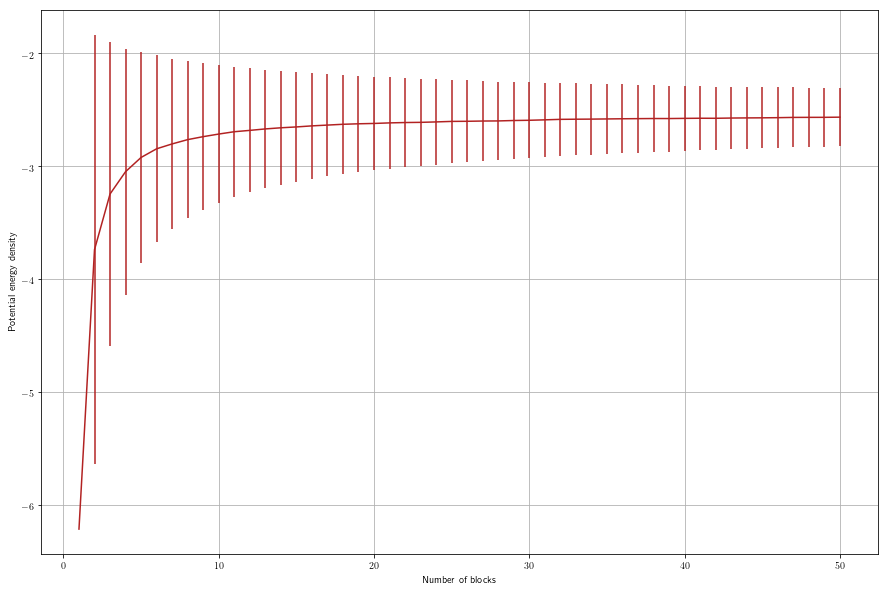

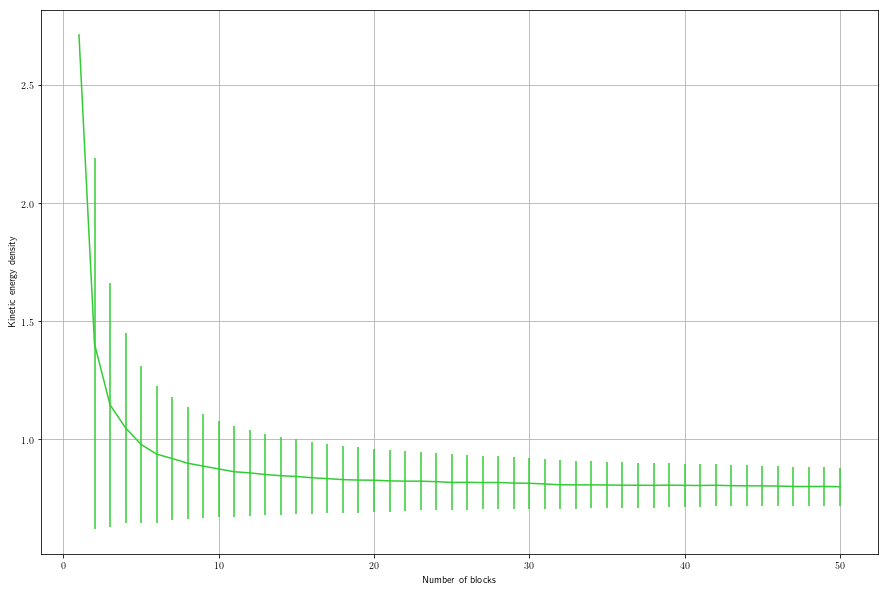

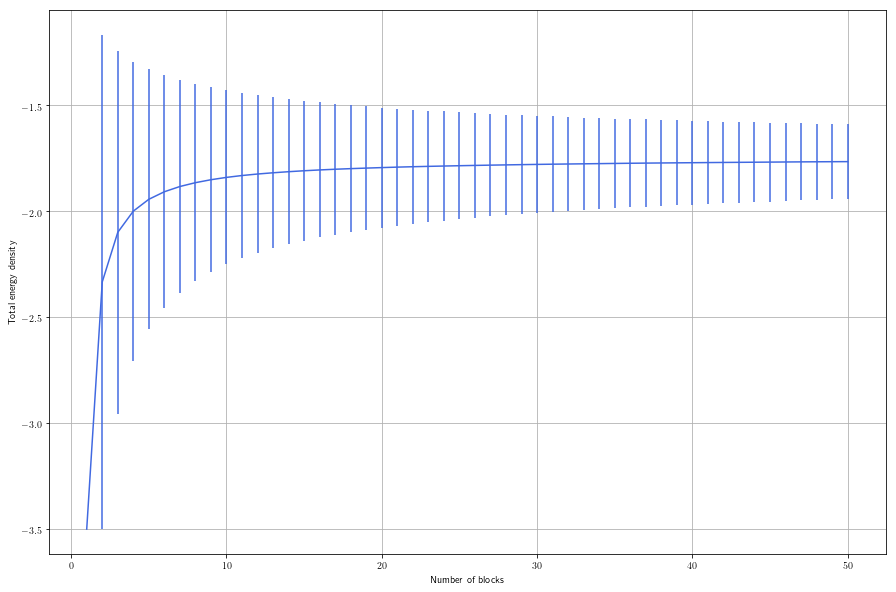

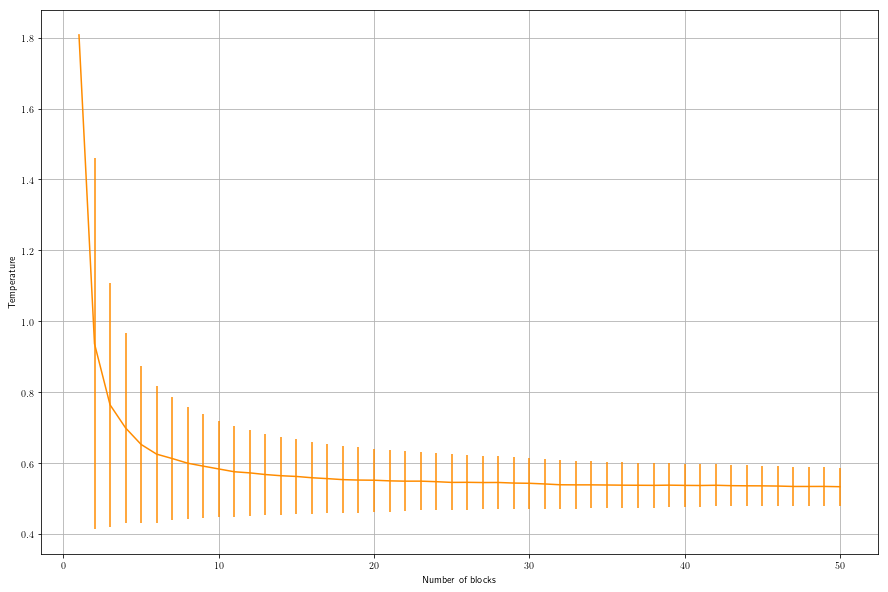

In [2]:
pot_en_avg, pot_en_std = np.loadtxt("output_potential_en.dat", unpack = True)
kin_en_avg, kin_en_std = np.loadtxt("output_kinetic_en.dat", unpack = True)
tot_en_avg, tot_en_std = np.loadtxt("output_total_en.dat", unpack = True)
temp_avg, temp_std = np.loadtxt("output_temperature.dat", unpack = True)

plt.figure(1, figsize = (15,10))
plt.errorbar(range(1, len(pot_en_avg) + 1), pot_en_avg, yerr = pot_en_std, label = "Potential energy", color = colors[0])
plt.ylabel("Potential energy density")
plt.xlabel("Number of blocks")
plt.grid(True)

plt.figure(2, figsize = (15,10))
plt.errorbar(range(1, len(kin_en_avg) + 1), kin_en_avg, yerr = kin_en_std, label = "Kinetic energy", color = colors[1])
plt.ylabel("Kinetic energy density")
plt.xlabel("Number of blocks")
plt.grid(True)

plt.figure(3, figsize = (15,10))
plt.errorbar(range(1, len(tot_en_avg) + 1), tot_en_avg, yerr = tot_en_std, label = "Total energy", color = colors[2])
plt.ylabel("Total energy density")
plt.xlabel("Number of blocks")
plt.grid(True)

plt.figure(4, figsize = (15,10))
plt.errorbar(range(1, len(temp_avg) + 1), temp_avg, yerr = temp_std, label = "Temperature", color = colors[3])
plt.ylabel("Temperature")
plt.xlabel("Number of blocks")
plt.grid(True)

plt.show()

The three plots of the energy all together:

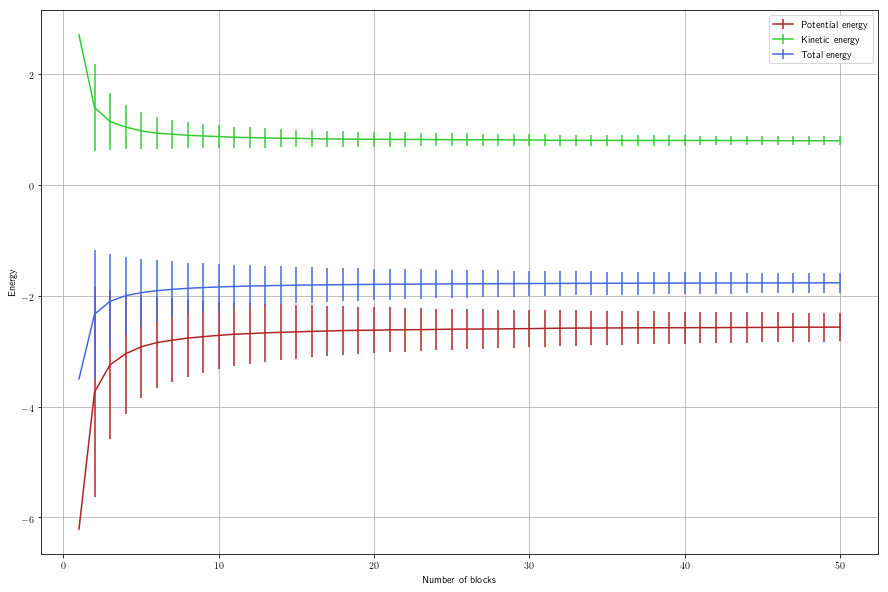

In [3]:
plt.figure(figsize = (15,10))
plt.errorbar(range(1, len(pot_en_avg) + 1), pot_en_avg, yerr = pot_en_std, label = "Potential energy", color = colors[0])
plt.errorbar(range(1, len(kin_en_avg) + 1), kin_en_avg, yerr = kin_en_std, label = "Kinetic energy", color = colors[1])
plt.errorbar(range(1, len(tot_en_avg) + 1), tot_en_avg, yerr = tot_en_std, label = "Total energy", color = colors[2])
plt.xlabel("Number of blocks")
plt.ylabel("Energy")
plt.grid(True)
plt.legend()
plt.show()

#### Exercise 04.3

The following plot shows the evolution, as the simulation time increases, of the pressure of the system.
The average value and its standard deviation are calculated with a blocking technique.
The input parameters are the same as in the previous simulation.

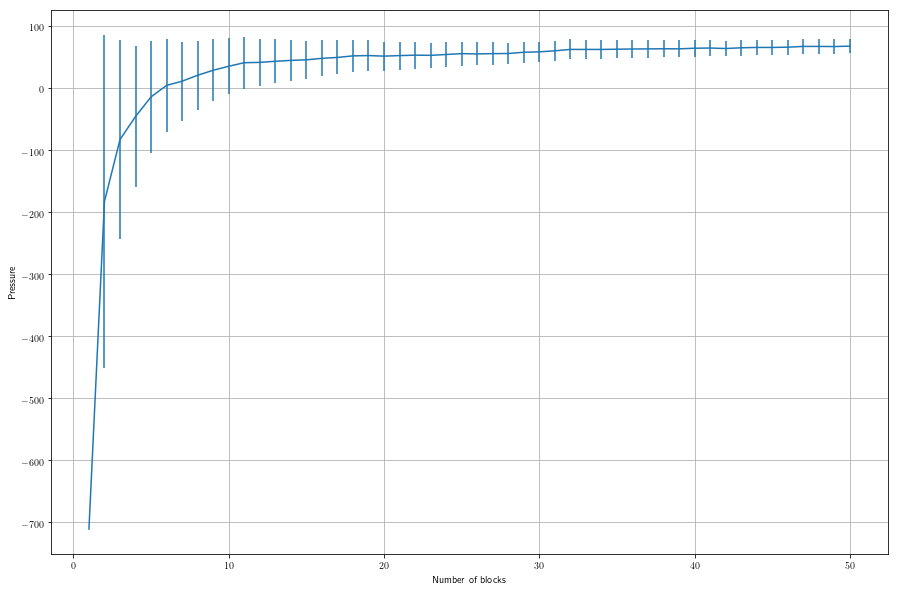

In [4]:
pressure_avg, pressure_std = np.loadtxt("output_pressure.dat", unpack = True)

plt.figure(figsize = (15,10))
plt.errorbar(range(1, len(pressure_avg) + 1), pressure_avg, yerr = pressure_std, label = "Pressure")
plt.ylabel("Pressure")
plt.xlabel("Number of blocks")
plt.grid(True)

plt.show()

#### Exercise 04.4

The following plots show the results of the simulation, with the code developed in this exercise, of some physical systems at equilibrium.
For each system, the simulation was run a first time (without doing any measurement) in order to reach an equilibrium state; then, with the same parameter, another simulation was run from which the physical quantities were extracted. 

In [5]:
# Physical constants in SI units (arbitrarily approximated...)
boltzmann_constant = 1.381
atomic_mass_unit = 1.661e-27

# Utilities
titles = [
    r"Total energy density / $\mathrm{J}$",
    r"Potential energy density / $\mathrm{J}$",
    r"Kinetic energy density / $\mathrm{J}$",
    r"Pressure / $\mathrm{Pa}$",
    r"Temperature / $\mathrm{K}$"
]
filename = [
    "total_en",
    "potential_en",
    "kinetic_en",
    "pressure",
    "temperature"
]

##### Argon

| Quantity | Value |
| --- | --- |
| $\sigma$ | 0.34 nm |
| $\epsilon/k_\text{B}$ | 120 K |
| m | 39.948 a.m.u. |

In [6]:
# Common parameters
length      = 0.34e-9
energy      = 120 * boltzmann_constant
mass        = 39.948 * atomic_mass_unit
unit        = [energy, energy, energy, energy / length**3, energy / boltzmann_constant]

Solid phase

| Quantity | Value |
| --- | --- |
| $\rho^*$ | 1.1 |
| $T^*$ | 0.8 |
| cutoff radius | 2.2 |

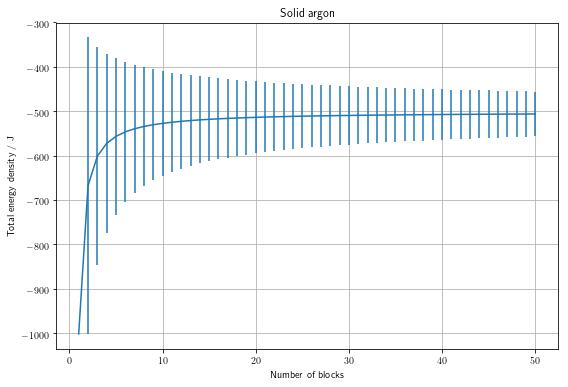

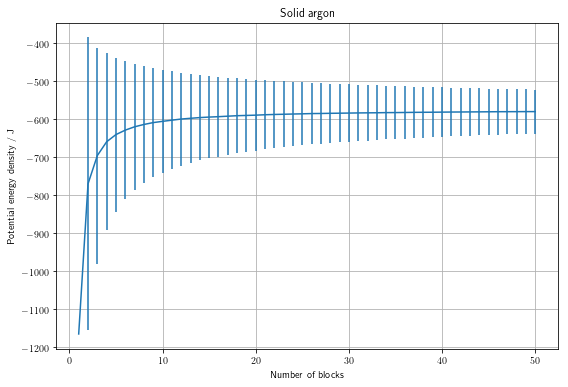

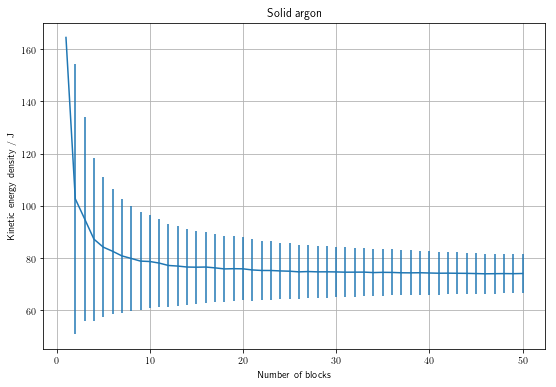

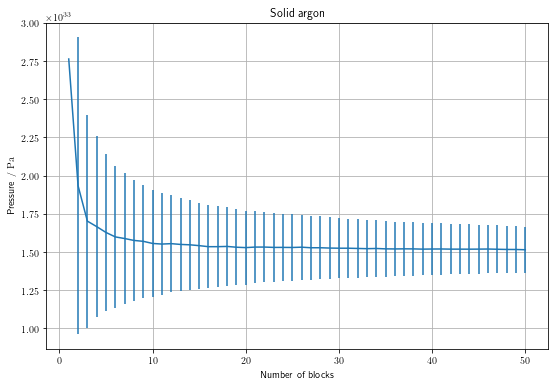

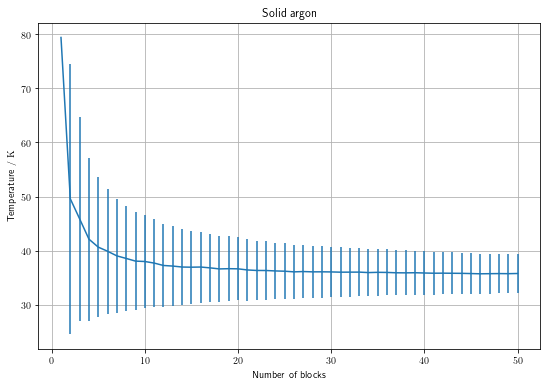

In [7]:
prefix = "argon/solid/output_"

for i in range(len(titles)):
    avg, std = np.loadtxt(prefix + filename[i] + ".dat", unpack = True)
    plt.figure(i, figsize = (9,6))
    plt.errorbar(range(1, len(avg) + 1), unit[i] * avg, yerr = unit[i] * std)
    plt.title("Solid argon")
    plt.ylabel(titles[i])
    plt.xlabel("Number of blocks")
    plt.grid(True)

plt.show()

Liquid phase

| Quantity | Value |
| --- | --- |
| $\rho^*$ | 0.8 |
| $T^*$ | 1.1 |
| cutoff radius | 2.5 |

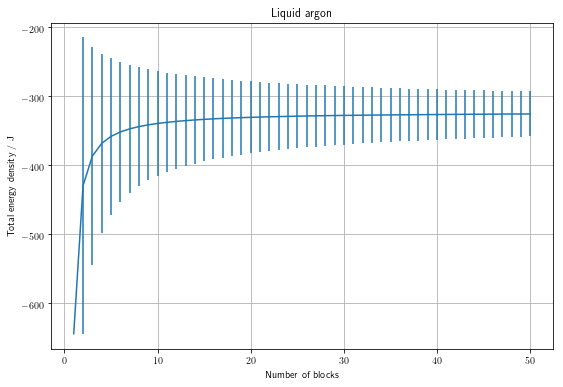

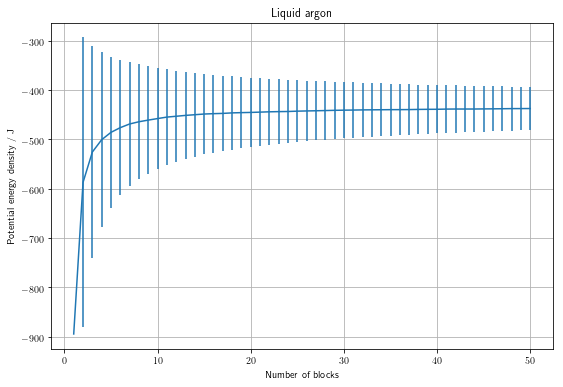

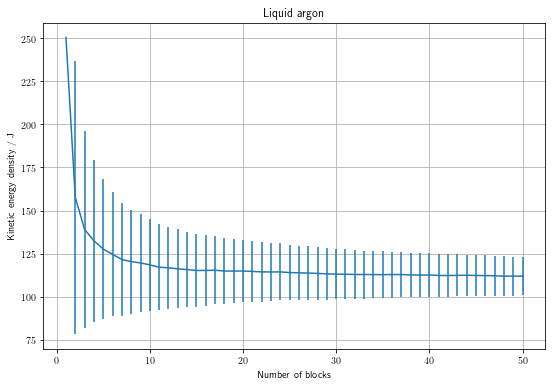

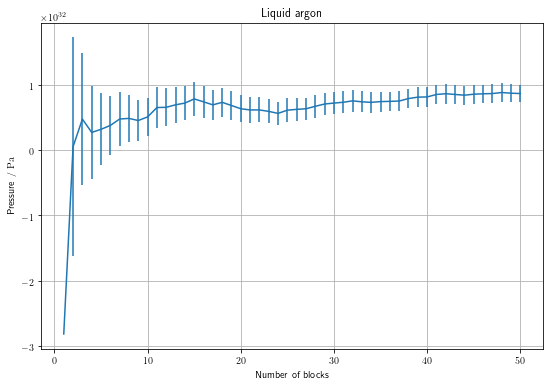

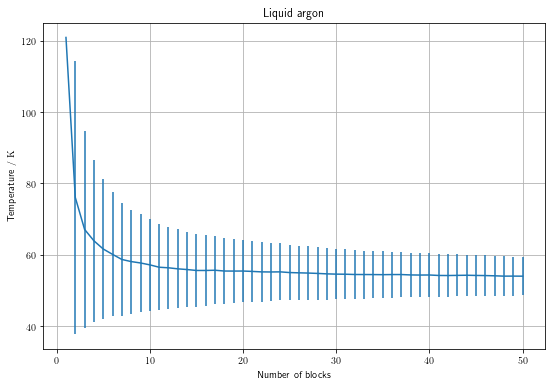

In [8]:
prefix = "argon/liquid/output_"

for i in range(len(titles)):
    avg, std = np.loadtxt(prefix + filename[i] + ".dat", unpack = True)
    plt.figure(i, figsize = (9,6))
    plt.errorbar(range(1, len(avg) + 1), unit[i] * avg, yerr = unit[i] * std)
    plt.title("Liquid argon")
    plt.ylabel(titles[i])
    plt.xlabel("Number of blocks")
    plt.grid(True)

plt.show()

Gaseous phase

| Quantity | Value |
| --- | --- |
| $\rho^*$ | 0.05 |
| $T^*$ | 1.2 |
| cutoff radius | 5.0 |

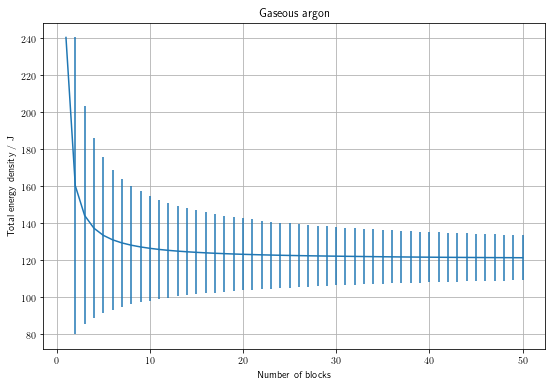

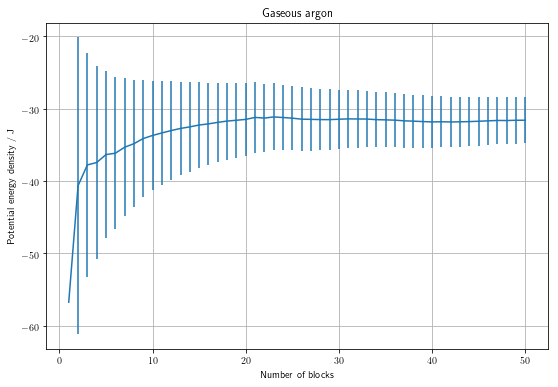

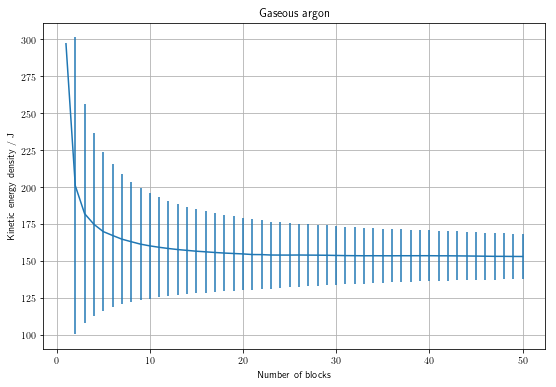

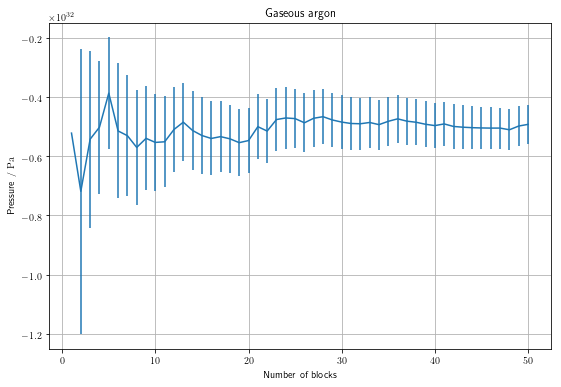

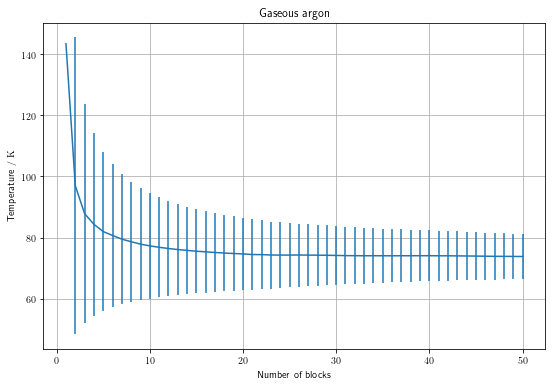

In [9]:
prefix = "argon/gaseous/output_"

for i in range(len(titles)):
    avg, std = np.loadtxt(prefix + filename[i] + ".dat", unpack = True)
    plt.figure(i, figsize = (9,6))
    plt.errorbar(range(1, len(avg) + 1), unit[i] * avg, yerr = unit[i] * std)
    plt.title("Gaseous argon")
    plt.ylabel(titles[i])
    plt.xlabel("Number of blocks")
    plt.grid(True)

plt.show()

##### Krypton

| Quantity | Value |
| --- | --- |
| $\sigma$ | 0.364 nm |
| $\epsilon/k_\text{B}$ | 164 K |
| m | 83.798 a.m.u. |

In [10]:
# Common parameters
length      = 0.364e-9
energy      = 164 * boltzmann_constant
mass        = 83.798 * atomic_mass_unit
unit        = [energy, energy, energy, energy / length**3, energy / boltzmann_constant]

Solid phase

| Quantity | Value |
| --- | --- |
| $\rho^*$ | 1.1 |
| $T^*$ | 0.8 |
| cutoff radius | 2.2 |

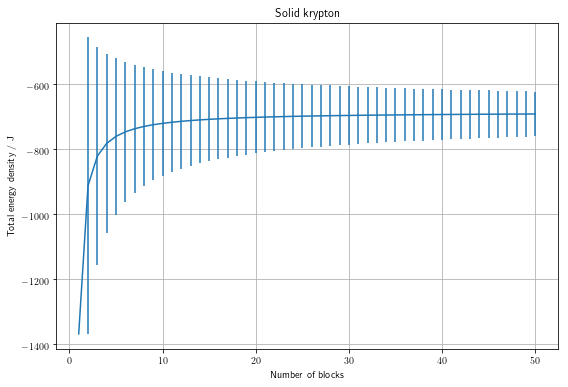

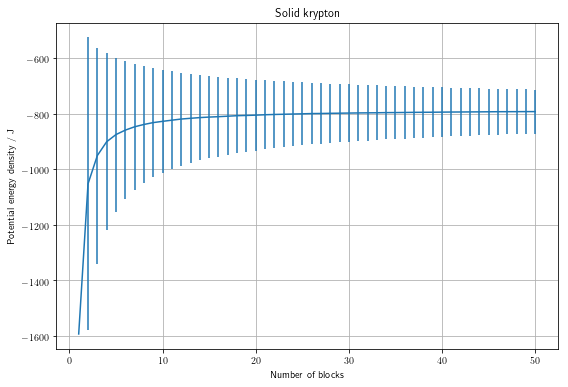

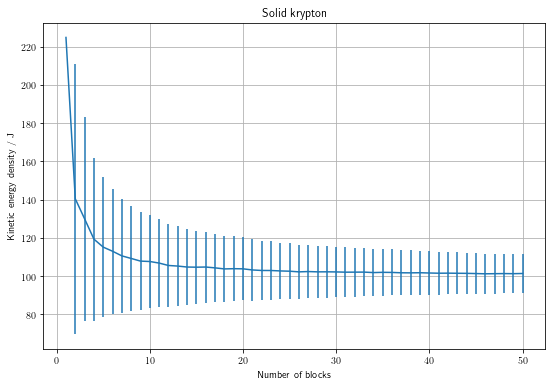

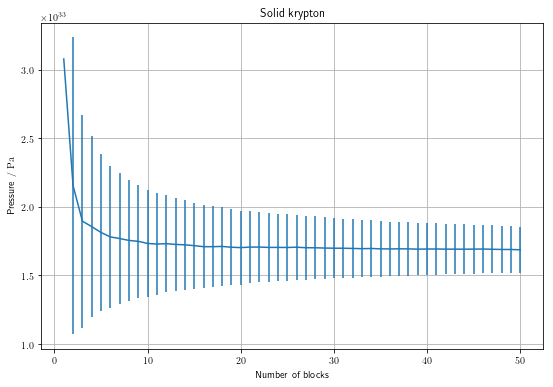

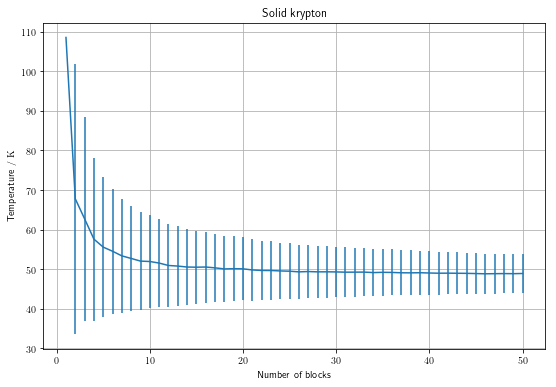

In [11]:
prefix = "krypton/solid/output_"

for i in range(len(titles)):
    avg, std = np.loadtxt(prefix + filename[i] + ".dat", unpack = True)
    plt.figure(i, figsize = (9,6))
    plt.errorbar(range(1, len(avg) + 1), unit[i] * avg, yerr = unit[i] * std)
    plt.title("Solid krypton")
    plt.ylabel(titles[i])
    plt.xlabel("Number of blocks")
    plt.grid(True)

plt.show()

Liquid phase

| Quantity | Value |
| --- | --- |
| $\rho^*$ | 0.8 |
| $T^*$ | 1.1 |
| cutoff radius | 2.5 |

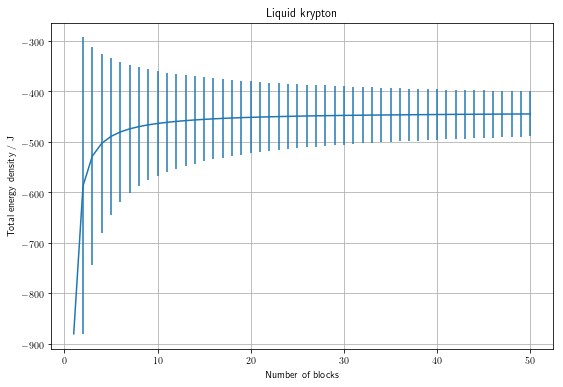

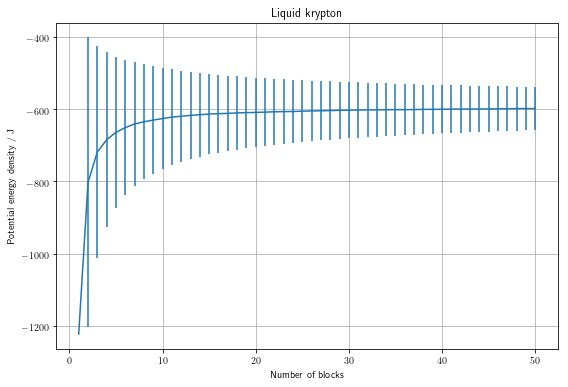

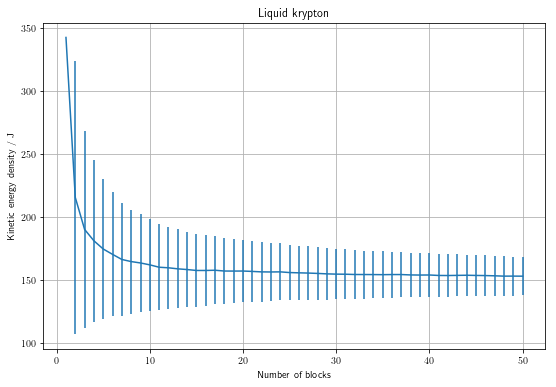

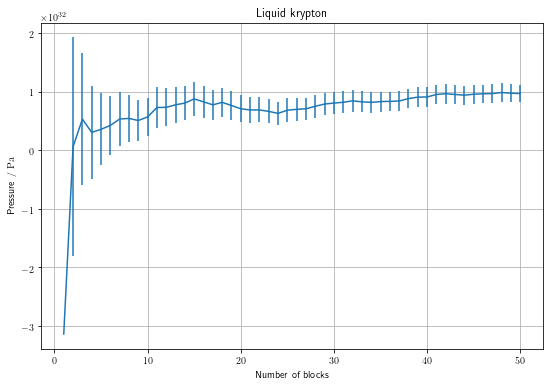

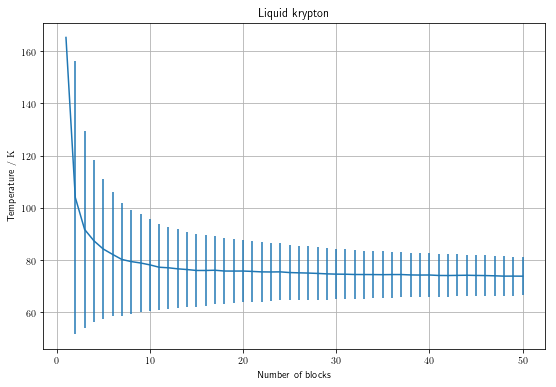

In [12]:
prefix = "krypton/liquid/output_"

for i in range(len(titles)):
    avg, std = np.loadtxt(prefix + filename[i] + ".dat", unpack = True)
    plt.figure(i, figsize = (9,6))
    plt.errorbar(range(1, len(avg) + 1), unit[i] * avg, yerr = unit[i] * std)
    plt.title("Liquid krypton")
    plt.ylabel(titles[i])
    plt.xlabel("Number of blocks")
    plt.grid(True)

plt.show()

Gaseous phase

| Quantity | Value |
| --- | --- |
| $\rho^*$ | 0.05 |
| $T^*$ | 1.2 |
| cutoff radius | 5.0 |

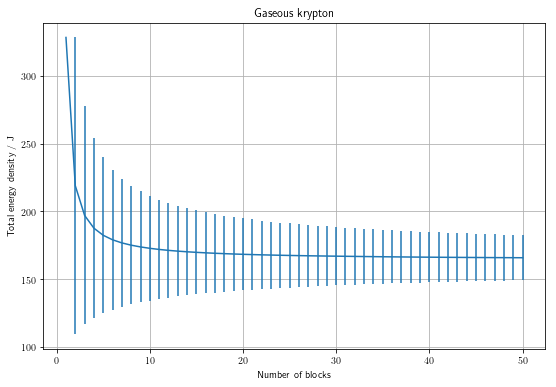

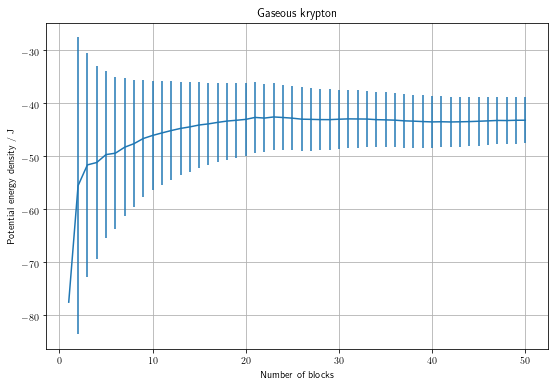

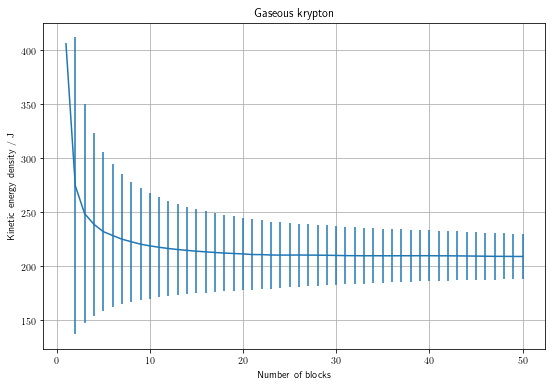

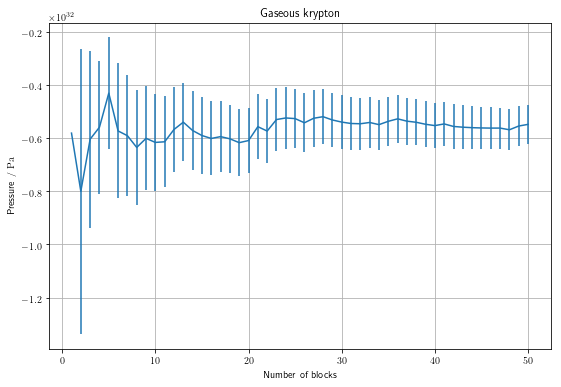

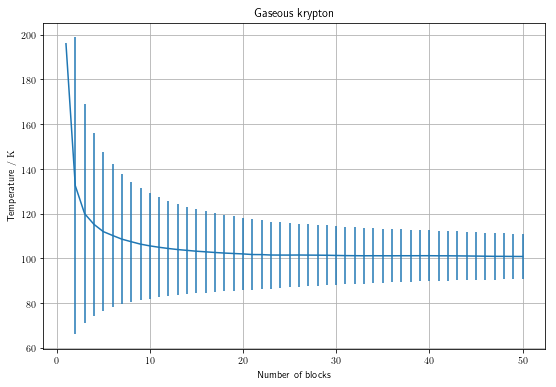

In [13]:
prefix = "krypton/gaseous/output_"

for i in range(len(titles)):
    avg, std = np.loadtxt(prefix + filename[i] + ".dat", unpack = True)
    plt.figure(i, figsize = (9,6))
    plt.errorbar(range(1, len(avg) + 1), unit[i] * avg, yerr = unit[i] * std)
    plt.title("Gaseous krypton")
    plt.ylabel(titles[i])
    plt.xlabel("Number of blocks")
    plt.grid(True)

plt.show()